In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import hopfield
import skimage
from skimage import data

In [2]:
def noize(src: np.ndarray, p, binary = False):
    d = src.copy()
    for r in range(int(p*len(d.data))):
        i = np.random.randint(len(d.data))
        if binary:
            d.data[i] = np.random.randint(2)
        else:
            d.data[i] = np.random.randint(2)*2-1
    return d.copy()

In [3]:
def show():
    pass

In [4]:
q = 0.2

def j(x, h):
    k = 2.0 * q / (abs(h) + q)
    if k != 0.0:
        if k * (x - 1) + 2 < 0:
            x = k * x - k + 3
        else:
            x = k * x - k + 1
    else:
        x = 1.0
    return x


def f(s, h):
    if h > 0:
        return j(s, h)
    else:
        return -j(-s, h)

In [5]:
size = 100
dim = (size,size)

In [6]:
learn_data = np.array([np.where(skimage.color.rgb2gray(cv2.resize(data.cat(),dim))<0.5,1.0,-1.0).flatten(), 
                       np.where(skimage.color.rgb2gray(cv2.resize(data.astronaut(),dim))<0.5,1.0,-1.0).flatten()
                      ])

In [7]:
n = hopfield.Hopfield(f)

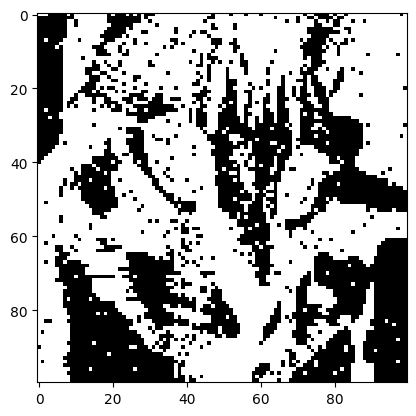

In [8]:
inp  = noize(learn_data[0],0.05)
plt.imshow(np.uint8(skimage.color.gray2rgb(np.rint((inp.copy().reshape(dim)+1.0)/2.0)*255)))

In [9]:
t, image = n.start(learn_data, inp, 250)

100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:15<00:00, 16.18it/s]


In [10]:
img = np.uint8(skimage.color.gray2rgb(np.rint((image.reshape(dim)+1.0)/2.0)*255))

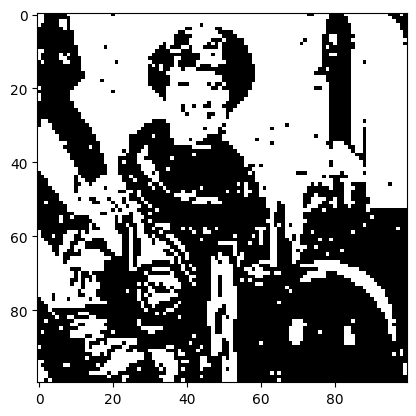

In [11]:
plt.imshow(img)


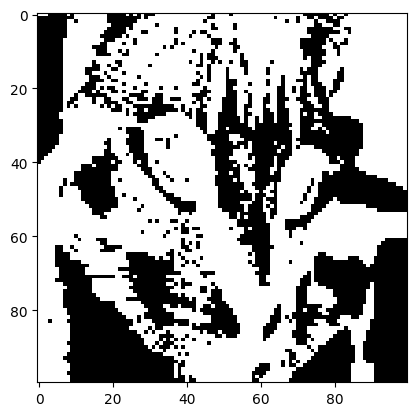

In [12]:
plt.imshow(np.uint8(skimage.color.gray2rgb(np.rint((learn_data[0].reshape(dim)+1.0)/2.0)*255)))